In [7]:
# import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# load and read the dataset
UC = pd.read_csv(r'C:\Users\foo2001\Documents\Collaborations\Quantum\Python\Python Folder\Unicorn_Companies.csv')
UC

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01/12/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23/01/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,29/06/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,18/04/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,06/05/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,19/10/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [12]:
UC.shape

(1074, 10)

In [14]:
UC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [32]:
# converting M and B
def converttonumber(x):
    if x[-1] == 'M':
        return float(x[:-1])*1e6
    elif x[-1] == 'B':
        return float(x[:-1])*1e9
    else:
        return x
    
# convert valuation column to float
UC['Valuation'] = UC['Valuation'].astype(str).str.replace('$', '').apply(converttonumber).astype(float)

# convert funding column to float
UC['Funding'] = UC['Funding'].astype(str).str.replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B','000000000').apply(converttonumber).astype(float)

# print the updated data frame
UC.head()

C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\3297854892.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  UC['Valuation'] = UC['Valuation'].astype(str).str.replace('$', '').apply(converttonumber).astype(float)
C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\3297854892.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  UC['Funding'] = UC['Funding'].astype(str).str.replace('Unknown', '0').str.replace('$', '').str.replace('M', '000000').str.replace('B','000000000').apply(converttonumber).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,01/12/2012,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,23/01/2014,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [34]:
UC.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [36]:
UC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   float64
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1058 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   float64
 9   Select Investors  1073 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 84.0+ KB


In [37]:
# convert date joined to datetime
UC['Date Joined'] = pd.to_datetime(UC['Date Joined'])

# covert year founded to datetime
UC['Year Founded'] = pd.to_datetime(UC['Year Founded'], format = '%Y')

C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\1825931863.py:2: UserWarning: Parsing '23/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  UC['Date Joined'] = pd.to_datetime(UC['Date Joined'])
C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\1825931863.py:2: UserWarning: Parsing '30/12/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  UC['Date Joined'] = pd.to_datetime(UC['Date Joined'])
C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\1825931863.py:2: UserWarning: Parsing '20/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  UC['Date Joined'] = pd.to_datetime(UC['Date Joined'])
C:\Users\foo2001\AppData\Local\Temp\ipykernel_14292\1825931863.py:2: UserWarning: Parsing '26/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  UC['Date Joined'] = pd

In [38]:
UC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 84.0+ KB


In [39]:
UC.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-01-12,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [40]:
# Calculating the Company ages when they joined unicorn
UC['Age of joining'] = ((UC['Date Joined'] - UC['Year Founded']).dt.days/365).round(1)

UC

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,1.800000e+11,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.5
1,SpaceX,1.000000e+11,2012-01-12,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.0
2,SHEIN,1.000000e+11,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.2
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",5.5
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,9.900000e+08,"58.com, Tencent Holdings",2.3
1071,Zihaiguo,1.000000e+09,2021-06-05,Consumer & retail,Chongqing,China,Asia,2018-01-01,8.000000e+07,"Xingwang Investment Management, China Capital ...",3.4
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005-01-01,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North...",16.8


In [41]:
 #apply the forward fill method to the 'CITY' and 'SELECT INVESTORS' columns

UC['City'] = UC['City'].ffill()
UC['Select Investors'] = UC['Select Investors'].ffill()

UC.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining
0,Bytedance,1.800000e+11,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.5
1,SpaceX,1.000000e+11,2012-01-12,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.0
2,SHEIN,1.000000e+11,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.2
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [43]:
# check if there is still missing values
UC.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of joining      0
dtype: int64

In [63]:
# ROI_Calculation. Which unicorn companies have had the biggest return on investment?

UC['ROI Calculation'] = ((UC['Valuation'] - UC['Funding']) / UC['Funding'] * 100).round(1)

# sort table using ROI Calculation
UC = UC.sort_values(by=['ROI Calculation'], ascending = False)
UC.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining,ROI Calculation
424,Uplight,2.000000e+09,2021-03-03,Other,Boulder,United States,North America,2019-01-01,0.0,"Rubicon Technology Partners, Max Ventures, Inc...",2.2,inf
1002,Poizon,1.000000e+09,2019-04-29,Mobile & telecommunications,Shanghai,China,Asia,2015-01-01,0.0,"DST Global, Sequoia Capital China, Gaorong Cap...",4.3,inf
733,DistroKid,1.000000e+09,2021-08-16,Internet software & services,New York,United States,North America,2013-01-01,0.0,"Insight Partners, Silversmith Capital Partners...",8.6,inf
945,Iodine Software,1.000000e+09,2021-01-12,Data management & analytics,Austin,United States,North America,2010-01-01,0.0,"Advent International, Bain Capital Ventures, S...",11.0,inf
947,Kendra Scott,1.000000e+09,2016-12-21,Consumer & retail,Austin,United States,North America,2002-01-01,0.0,"Berkshire Partners, Norwest Venture Partners",15.0,inf


In [75]:
# How long does it usually take for a company to become a unicorn? Has it always been this way?
average_age_of_joining = UC['Age of joining'].mean()
average_age_of_joining

7.498510242085659

In [87]:
# It takes an average of 7 years for a company to become a unicorn

In [76]:
# Which countries have the most unicorns? Are there any cities that appear to be industry hubs?
countries = UC['Country'].value_counts().sort_values(ascending = False)
countries

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Indonesia                 6
Sweden                    6
Mexico                    6
Netherlands               6
Hong Kong                 6
Ireland                   5
Switzerland               5
Japan                     5
Norway                    4
Finland                   4
Spain                     3
Belgium                   3
Turkey                    3
United Arab Emirates      3
South Africa              2
Colombia                  2
Austria                   2
Estonia                   2
Vietnam                   2
Denmark                   2
Thailand                  2
Philippines               2
Chile                     2
Bahamas             

In [79]:
# Are there any cities that appear to be industry hubs?
City = UC['City'].value_counts().sort_values(ascending = False)
City

San Francisco    153
New York         108
Beijing           65
Shanghai          44
London            35
                ... 
Hefei              1
Central            1
Roubaix            1
Jeju-do            1
Plantation         1
Name: City, Length: 256, dtype: int64

In [77]:
# Which investors have funded the most unicorns?
Select_Investors = UC['Select Investors'].value_counts().sort_values(ascending = False)
Select_Investors

Sequoia Capital                                                       3
Tiger Global Management, Sequoia Capital India, Ribbit Capital        2
Greylock Partners, Google Ventures, BlackRock                         2
SoftBank Group                                                        2
Qualcomm Ventures, Accel, Canaan Partners                             2
                                                                     ..
Obvious Ventures, Qualcomm Ventures, Andreessen Horowitz              1
CreditEase Fintech Investment Fund, BMW i Ventures, SoftBank Group    1
SoftBankGroup, Blackrock, Alibaba Group                               1
Ant Financial Services Group, GGV Capital                             1
Target Global, UBS Asset Management, Mubadala Capital                 1
Name: Select Investors, Length: 1058, dtype: int64

In [91]:
# Which continent have the most unicorns? 
Company_Counts = UC['Continent'].value_counts().sort_values(ascending = False)
Company_Counts

North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64

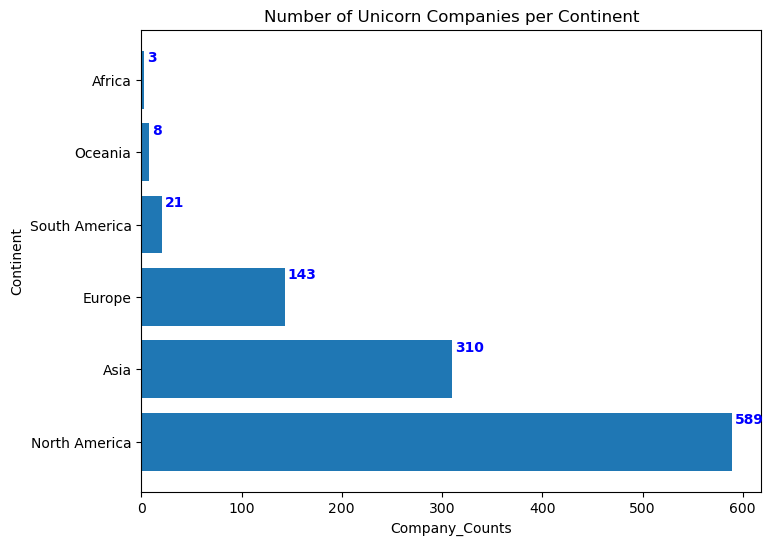

In [92]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar chart
plt.barh(Company_Counts.index, Company_Counts.values)

# Add data labels to the chart
for i, v in enumerate(Company_Counts.values):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

# Set the title and axis labels
plt.title('Number of Unicorn Companies per Continent')
plt.xlabel('Company_Counts')
plt.ylabel('Continent')

# Display the chart
plt.show()

In [80]:
# Oldest Unicorn company
UC = UC.sort_values(by=['Age of joining'], ascending = False)
UC.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of joining,ROI Calculation
189,Otto Bock HealthCare,4.000000e+09,2017-06-24,Health,Duderstadt,Germany,Europe,1919-01-01,0.0,EQT Partners,98.5,inf
373,Promasidor Holdings,2.000000e+09,2016-08-11,Consumer & retail,Bryanston,South Africa,Asia,1979-01-01,556000000.0,"IFC, Ajinomoto",37.6,259.7
699,Five Star Business Finance,1.000000e+09,2021-03-26,Other,Chennai,India,Asia,1984-01-01,456000000.0,"Sequoia Capital India, Tiger Global Management...",37.3,119.3
1043,Thirty Madison,1.000000e+09,2021-02-06,Health,New York,United States,North America,1993-01-01,210000000.0,"Northzone Ventures, Maveron, Johnson & Johnson...",28.1,376.2
840,Radius Payment Solutions,1.000000e+09,2017-11-27,Fintech,Crewe,United Kingdom,Europe,1990-01-01,200000000.0,Inflexion Private Equity,27.9,400.0


In [93]:
# Summary statistics per country and ROI
UC.groupby('Continent')['ROI Calculation'].describe().sort_values(by=['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Asia,310.0,inf,NaN,-50.0,200.000,347.4,616.850,inf
Europe,143.0,inf,NaN,0.0,200.850,331.0,641.700,inf
North America,589.0,inf,NaN,-50.0,306.500,506.1,798.900,inf
Oceania,8.0,1430.762500,2217.070336,252.1,611.675,689.1,843.525,6893.0
Africa,3.0,411.233333,431.548425,82.8,166.850,250.9,575.450,900.0
South America,21.0,340.533333,323.709779,38.9,150.000,280.7,440.500,1566.7


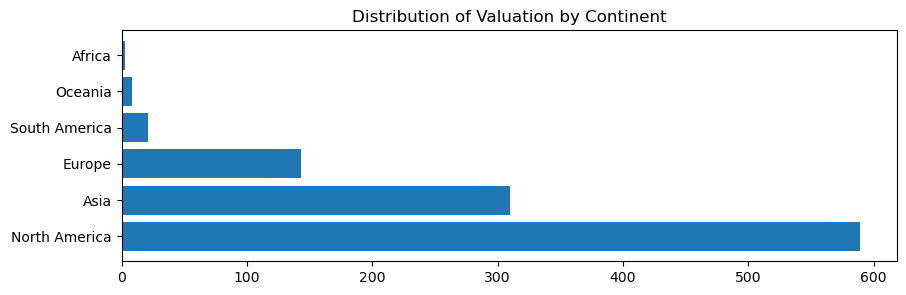

In [101]:
# view distribution of Valuation by Continent
plt.figure(figsize = (10, 3))
plt.barh(Continent.index, Continent.values)
plt.title('Distribution of Valuation by Continent')
plt.show()

In [107]:
# Top 3 Continent by Valuation
top3_loc = UC.groupby('Continent')['Valuation'].sum()[:3]
top3_loc

Continent
Africa    5.000000e+09
Asia      1.067000e+12
Europe    5.030000e+11
Name: Valuation, dtype: float64

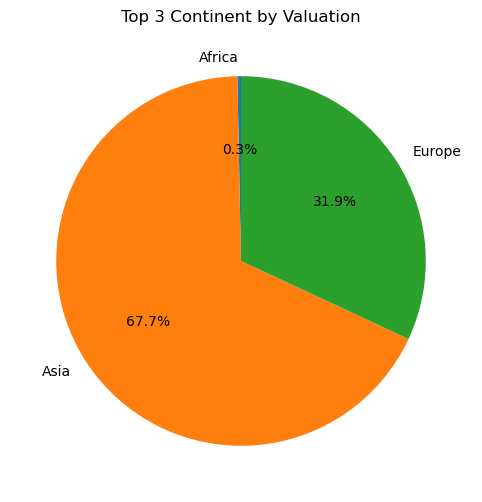

In [108]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(top3_loc.values, labels=top3_loc.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Top 3 Continent by Valuation')

# Display the chart
plt.show()


In [111]:
# Bottom 2 Continent by Valuation
bot3_loc = UC.groupby('Continent')['Valuation'].sum()[4:].sort_values()
bot3_loc

Continent
South America    4.800000e+10
Oceania          5.600000e+10
Name: Valuation, dtype: float64

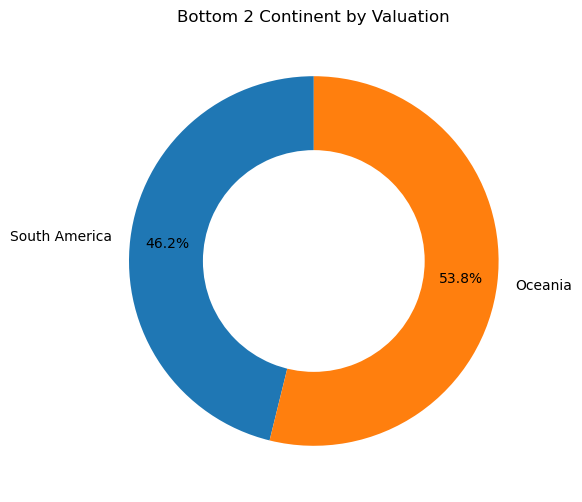

In [112]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a donut chart
ax.pie(bot3_loc.values, labels=bot3_loc.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.pie([1], colors=['white'], radius=0.6)

# Add a circle to create a donut chart
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set the title
plt.title('Bottom 2 Continent by Valuation')

# Display the chart
plt.show()
